## MovieLens Dataset

In [62]:
import pandas as pd
import numpy as np

In [3]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('C:/Users/p_mal/Downloads/ml-1m/ml-1m/users.dat', sep='::', header=None,names=unames,engine='python')

In [5]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('C:/Users/p_mal/Downloads/ml-1m/ml-1m/ratings.dat', sep='::', header=None,names=rnames,engine="python")

In [6]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('C:/Users/p_mal/Downloads/ml-1m/ml-1m/movies.dat', sep='::', header=None,names=mnames,engine="python")

In [7]:
data = pd.merge(pd.merge(ratings, users), movies)

In [13]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [15]:
# filter down all movies that have more than 250 ratings
ratings_by_title = data.groupby('title').size()
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [20]:
mean_ratings = mean_ratings.ix[active_titles]
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [21]:
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [22]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [23]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [26]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.ix[active_titles]
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## Babynames

In [30]:
names2016=pd.read_csv('C:/Users/p_mal/Downloads/names/yob2016.txt',names=['name', 'sex', 'births'])

In [31]:
names2016.head()

,name,sex,births
0,Emma,F,19414
1,Olivia,F,19246
2,Ava,F,16237
3,Sophia,F,16070
4,Isabella,F,14722


In [32]:
names2016.groupby('sex').births.sum()

sex
F    1756647
M    1880674
Name: births, dtype: int64

In [33]:
years = range(1880, 2017)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'C:/Users/p_mal/Downloads/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

In [34]:
names = pd.concat(pieces, ignore_index=True)

In [41]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [42]:
total_births.head()

sex,F,M
year,,
1880,90992,110491
1881,91953,100743
1882,107847,113686
1883,112318,104627
1884,129020,114443


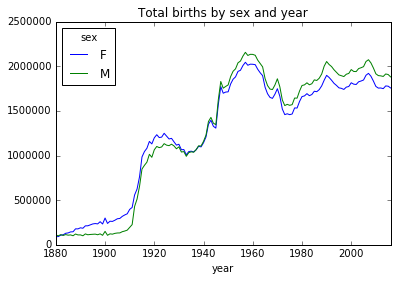

In [48]:
import matplotlib
%matplotlib inline

total_births.plot(title='Total births by sex and year')

In [49]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [51]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [55]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [56]:
total_births = top1000.pivot_table('births', index='year', columns='name',aggfunc=sum)

In [57]:
subset = total_births[['James', 'Peter', 'Daniel', 'Olivia']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000202A2F79AC8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000202A301EDD8>], dtype=object)

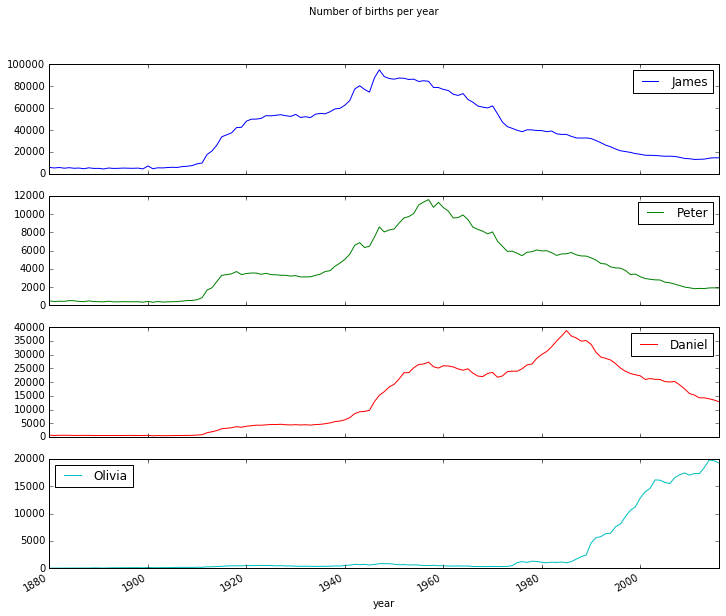

In [59]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

In [60]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

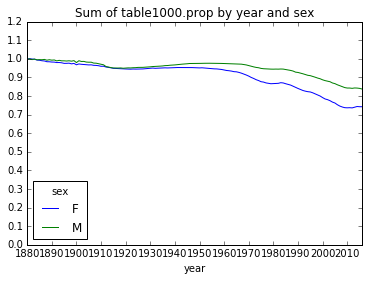

In [63]:
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [66]:
df = boys[boys.year == 2016]
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [101]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [107]:
diversity["F"]=diversity["F"].apply(lambda x:x[0])
diversity["M"]=diversity["M"].apply(lambda x:x[0])

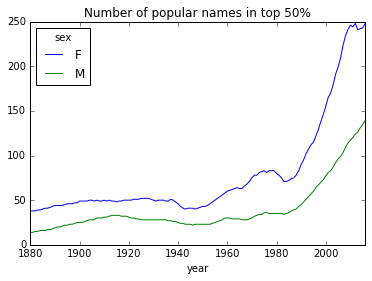

In [109]:
diversity.plot(title="Number of popular names in top 50%")